# Linear Transformations in 2D and 3D
## numpy.matrix
#### Example: matrix - vector multiplication

In [1]:
import numpy as np
T = np.matrix( [[1, 2], [3, 4]] )
v = np.array ( [1, 1] )

In [2]:
T

matrix([[1, 2],
        [3, 4]])

In [3]:
v

array([1, 1])

In [4]:
T.dot(v)

matrix([[3, 7]])

## Linear Transformations in 2D
We can use matrices to express linear transformations of  
2D sets of points (or any object). Typical transformations are reflection, rotation or scaling, see [Examples of linear transformation matrices](https://en.wikipedia.org/wiki/Linear_map). Let's implement a framework to experiment with such linear maps. 

In [5]:
%pylab nbagg
n = 10
points = [[cos(2*pi*t/n), sin(2*pi*t/n)] for t in range(n)]

Populating the interactive namespace from numpy and matplotlib


In [6]:
array(points).T[0]

array([ 1.        ,  0.80901699,  0.30901699, -0.30901699, -0.80901699,
       -1.        , -0.80901699, -0.30901699,  0.30901699,  0.80901699])

In [7]:
x = array(points).T[0]; y = array(points).T[1]

<IPython.core.display.Javascript object>


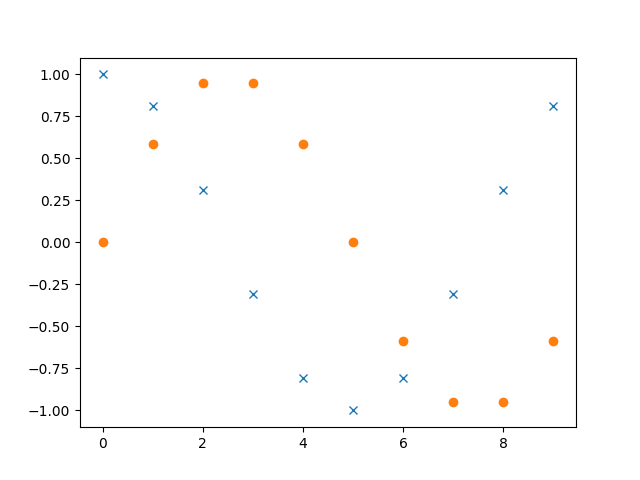

In [9]:
ifig = 10; close(ifig); figure(ifig)
plot(x, 'x')
plot(y, 'o')

<IPython.core.display.Javascript object>


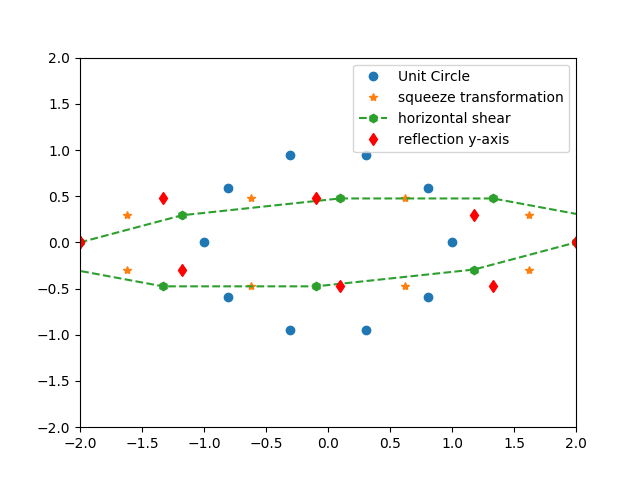

In [31]:
ifig = 1; close(ifig); figure(ifig)
plot(x, y, 'o', label = 'Unit Circle')
xlim(-2, 2); ylim(-2, 2)
legend()

In [32]:
T1 = matrix( [[2, 0], [0, 1./2]])
T1

matrix([[ 2. ,  0. ],
        [ 0. ,  0.5]])

In [33]:
## Turn into array of tupples
vecs = array(points)

In [34]:
## example output
T1. dot(vecs[3]).A1       # .A1 returns flattened ndarray

array([-0.61803399,  0.47552826])

In [35]:
##Transformation:
T = T1
trans_vec = []
for i in range(len(vecs)):
    this_tv = T.dot(vecs[i]).A1
    trans_vec.append(this_tv)
    
## Transpose to make plotable arrays
xt = array(trans_vec).T[0]
yt = array(trans_vec).T[1]

## Plot
ifig = 1; figure(ifig)
plot(xt, yt, '*', label = 'squeeze transformation')
legend()

In [36]:
T2 = matrix( [[1, 1.5], [0, 1]] )

In [37]:
T = T2

## Transformation:
vecs = trans_vec # uncomment - result of previous trans is input for next
trans_vec = []
for i in range(len(vecs)):
    this_tv = T.dot(vecs[i]).A1
    trans_vec.append(this_tv)

trans_vec.append(trans_vec[0])

## Transpose to make plotable arrays
xt = array(trans_vec).T[0]
yt = array(trans_vec).T[1]

#Plot
ifig = 1; figure(ifig)
plot(xt, yt, 'h--', label = 'horizontal shear')
legend()

In [38]:
T3 = matrix( [[-1, 0], [0, 1]])

In [39]:
T = T3

## Transformation:
vecs = trans_vec # uncomment - result of previous trans is input for next
trans_vec = []
for i in range(len(vecs)):
    this_tv = T.dot(vecs[i]).A1
    trans_vec.append(this_tv)

trans_vec.append(trans_vec[0])

## Transpose to make plotable arrays
xt = array(trans_vec).T[0]
yt = array(trans_vec).T[1]

#Plot
ifig = 1; figure(ifig)
plot(xt, yt, 'rd', label = 'reflection y-axis')
legend()

## 3D Transformations
#### Building a Cube

In [119]:
%pylab nbagg
n = 10
c = 1.
pencil = linspace(-c/2., c/2., n)
upper = 0.5 * ones(n)
lower = -0.5 + zeros(n)

Populating the interactive namespace from numpy and matplotlib


In [120]:
upper

array([ 0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5])

In [121]:
line = array([pencil, lower, upper])
## reshape to have points list needed for transformation
one_edge = reshape(line.ravel(order='F'), (n, 3))

In [122]:
## how to build all of the edges?
dummy_sides = []
r = ['u', 'l']
for j in r:
    for k in r:
        dummy_sides.append(['p', j, k])

In [123]:
dummy_sides

[['p', 'u', 'u'], ['p', 'u', 'l'], ['p', 'l', 'u'], ['p', 'l', 'l']]

In [124]:
## and the other_dummy_sides
for this in dummy_sides:
    for i in [1, 2]:
        print(roll(array(this), i))

['u' 'p' 'u']
['u' 'u' 'p']
['l' 'p' 'u']
['u' 'l' 'p']
['u' 'p' 'l']
['l' 'u' 'p']
['l' 'p' 'l']
['l' 'l' 'p']


In [125]:
cube_sides = []
r = [upper, lower]
for j in r:
    for k in r:
        cube_sides.append([pencil, j, k])

In [126]:
## But first add sides with pencil in y and z coordinate
other_cube_sides = []
for this in cube_sides:
    for i in [1, 2]:
        other_cube_sides.append(roll(array(this), i, axis=0))

In [127]:
## each of these sides have to be reshaped to be an array of 3D points
reshape(array(cube_sides[0]).ravel(order='F'), (n, 3))

array([[-0.5       ,  0.5       ,  0.5       ],
       [-0.38888889,  0.5       ,  0.5       ],
       [-0.27777778,  0.5       ,  0.5       ],
       [-0.16666667,  0.5       ,  0.5       ],
       [-0.05555556,  0.5       ,  0.5       ],
       [ 0.05555556,  0.5       ,  0.5       ],
       [ 0.16666667,  0.5       ,  0.5       ],
       [ 0.27777778,  0.5       ,  0.5       ],
       [ 0.38888889,  0.5       ,  0.5       ],
       [ 0.5       ,  0.5       ,  0.5       ]])

In [128]:
cube_sides_points = []
for this in cube_sides + other_cube_sides:
    cube_sides_points.append(reshape(array(this).ravel(order='F'), (n, 3)))

In [129]:
%pylab nbagg
from mpl_toolkits.mplot3d import Axes3D

Populating the interactive namespace from numpy and matplotlib


In [130]:
def transp(points):
    return array(points).T[0], array(points).T[1], array(points).T[2]

In [131]:
cube_vecs = reshape(array(cube_sides_points), (12*n, 3))

In [132]:
x, y, z = transp(cube_vecs)
##print(x, y ,z)

<IPython.core.display.Javascript object>


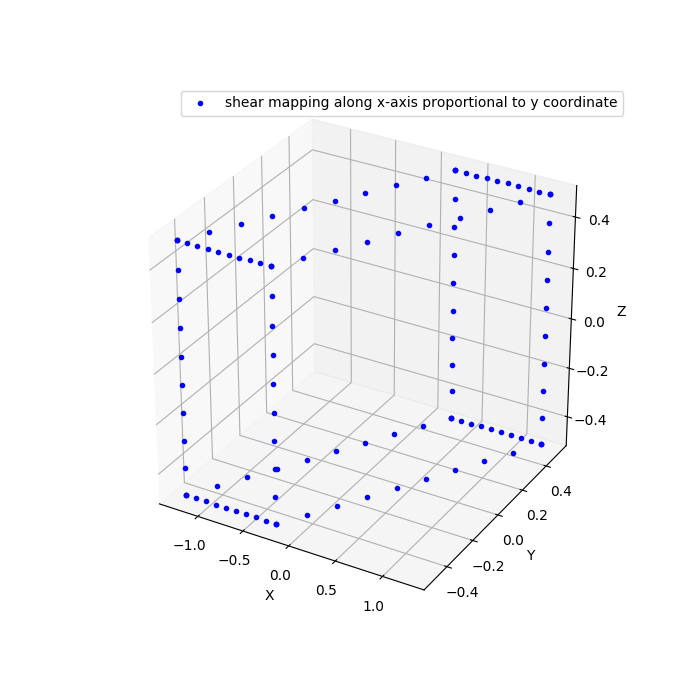

In [136]:
fig = figure(figsize=(7,7))

#this_label = 'helix'
#this_label = 'rotate $\pi/4$ counter-clockwise about x-axis'
this_label = 'shear mapping along x-axis proportional to y coordinate'
#this_label = 'cube'
ax = fig.gca(projection='3d')
ax.plot(x, y, z, '.b', label = this_label)
ax.legend()
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()

In [134]:
# shear mapping x-direction
sy = 1.5
T1 = matrix( [[1, sy, 0], [0, 1, 0], [0, 0, 1]] )

In [137]:
vecs = cube_vecs
T = T1
#transformation:
trans_vec = []
for i in range(len(vecs)):
    this_tv = T.dot(vecs[i]).A1
    trans_vec.append(this_tv)
    
#transpose to make plotable arrays
x, y, z, = transp(trans_vec)

## now plot again